### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


### Step 1: Reading and Understanding the Data

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**as we can see yr has only two values either 0 or 1 which means data is available for 2018 and 2019**

In [7]:
# we can drop the instant and dteday column as it is not required, we have month and year from this date in different columns
df.drop(['instant','dteday'],axis=1,inplace=True)

In [8]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [9]:
# let's drop casual and registered as well because out target variable cnt is a sum of there two columns
df.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
df.shape

(730, 12)

In [11]:
# mapping the season columns as per the data dictionary
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [12]:
# mapping the months
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
# mapping the weekdays
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
# mapping the weathersit as per data dictionary
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Bad',4:'Severe'})

In [15]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801


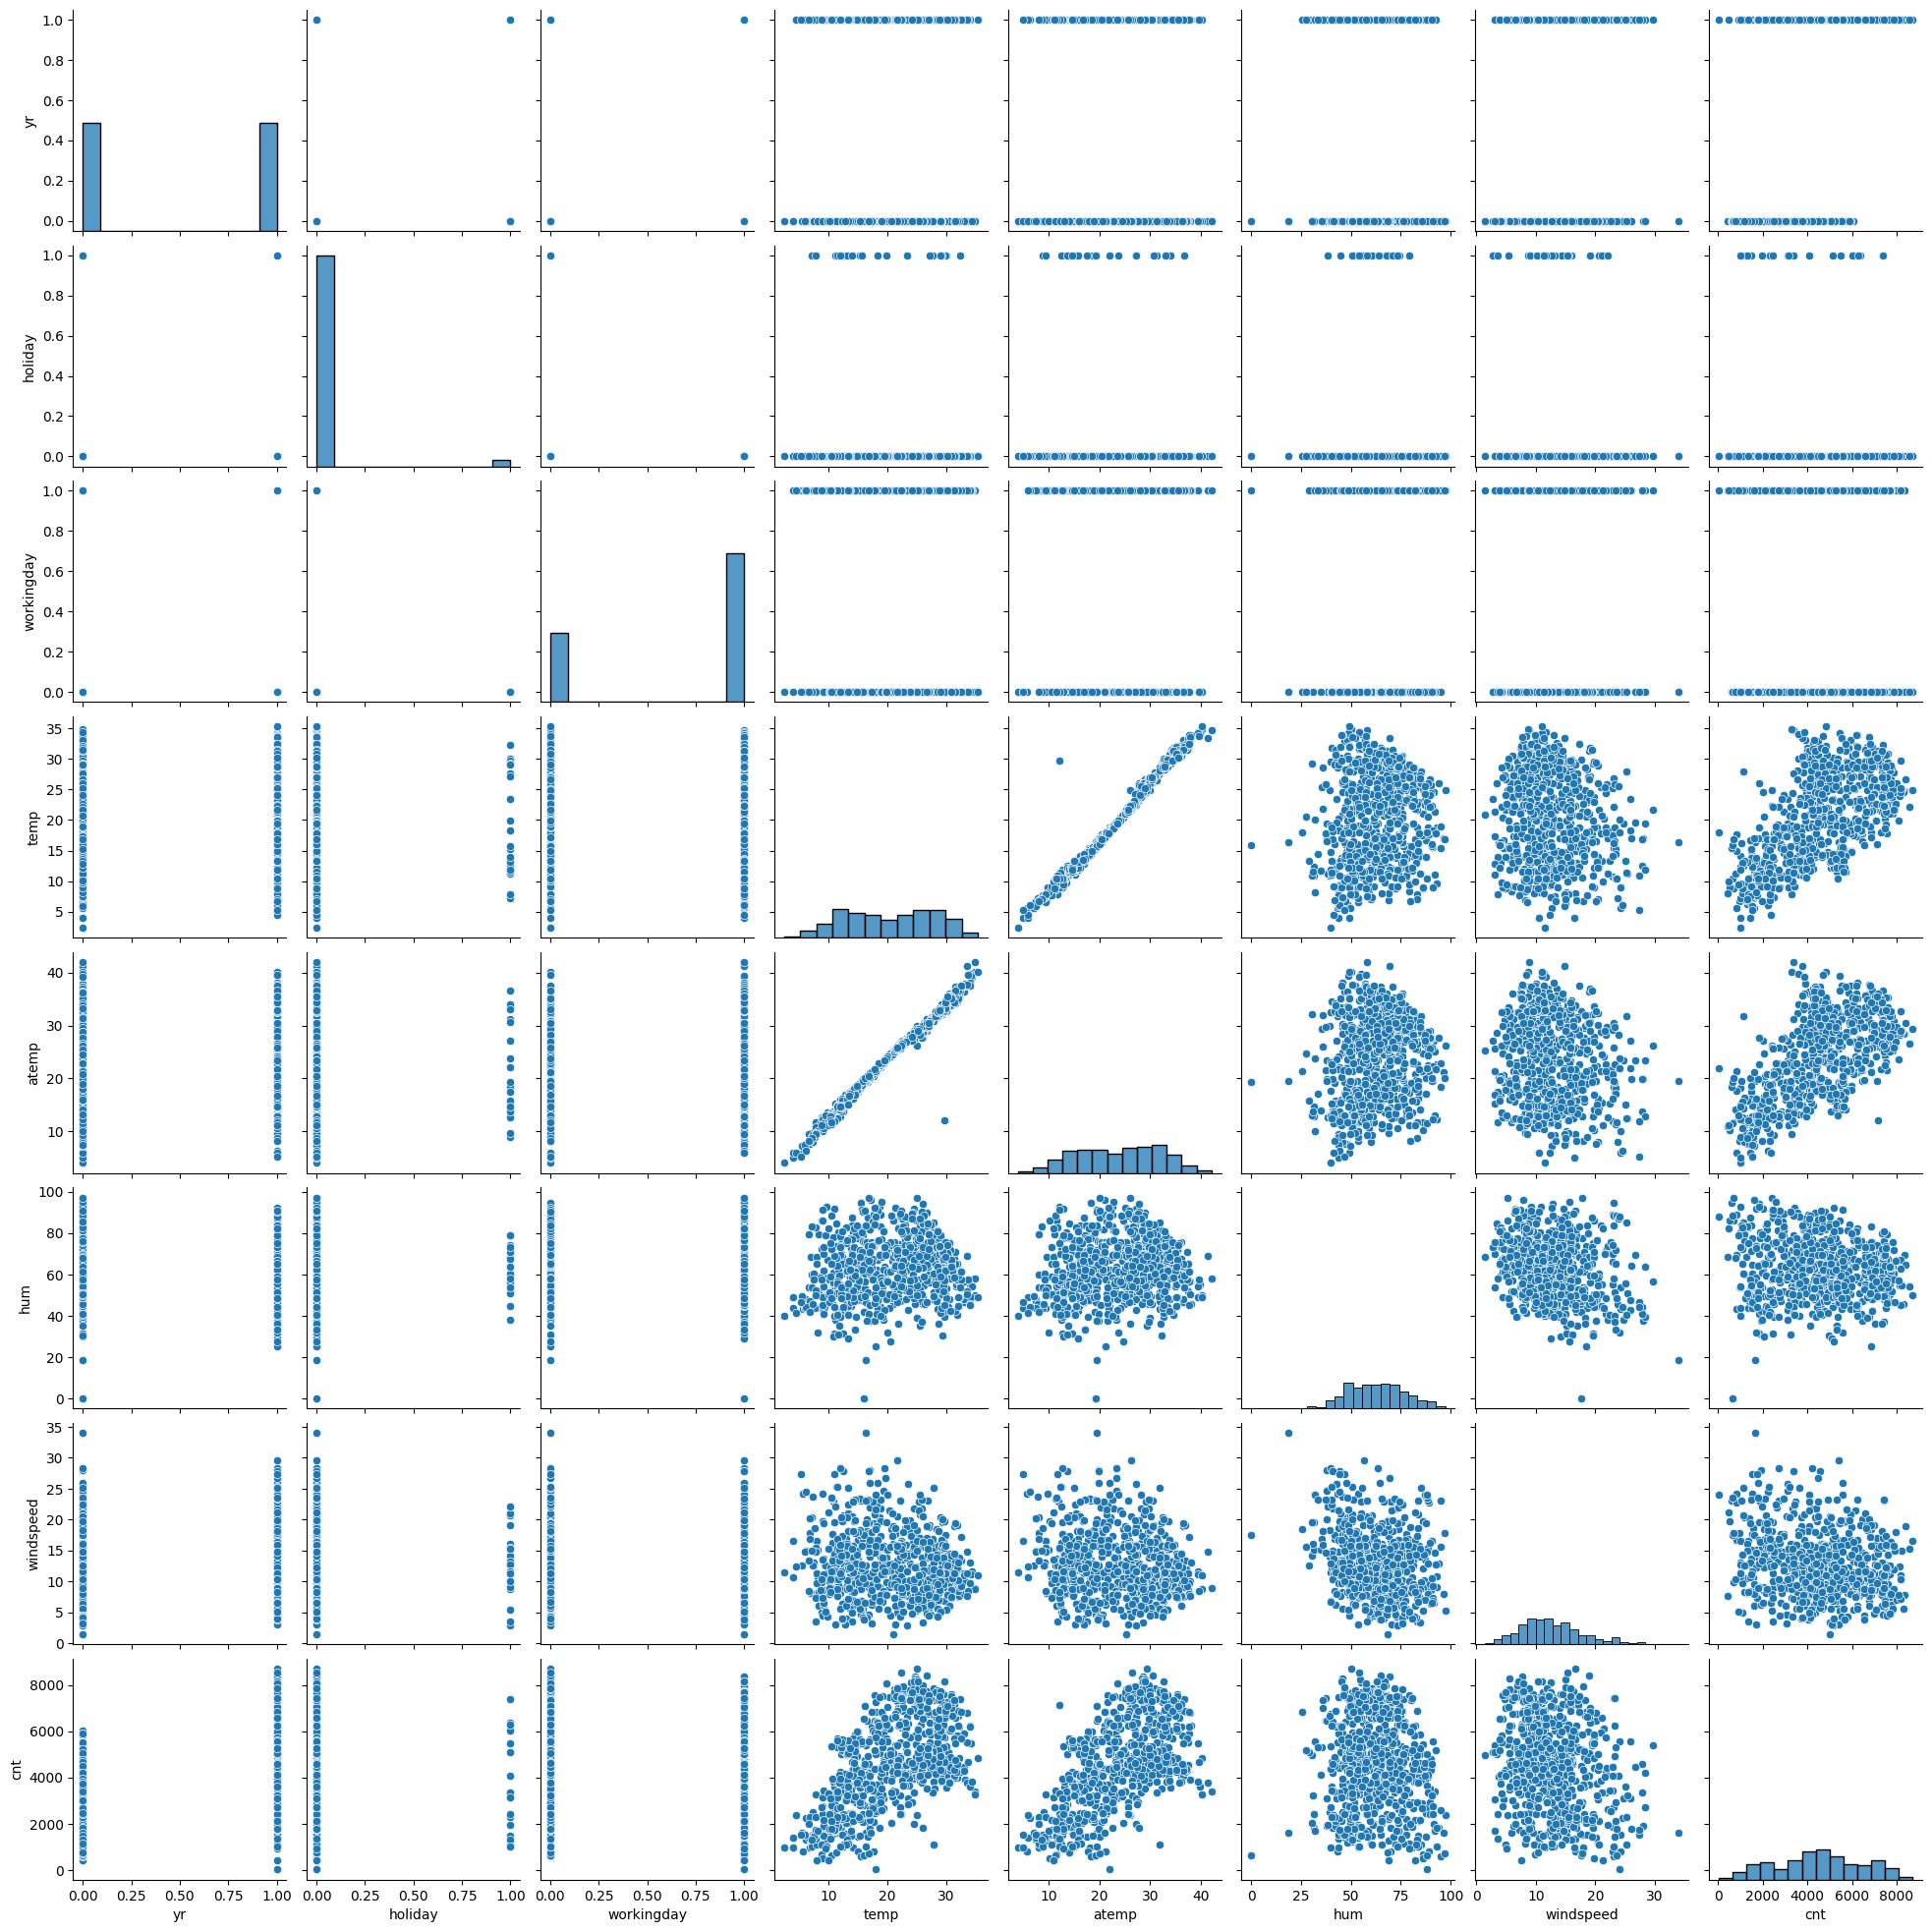

In [16]:
# visualising the numeric variables
sns.pairplot(df)
plt.show()

- We can see a linear relationship between cnt, temp and atemp.
- We can see temp and atemp are highly linear

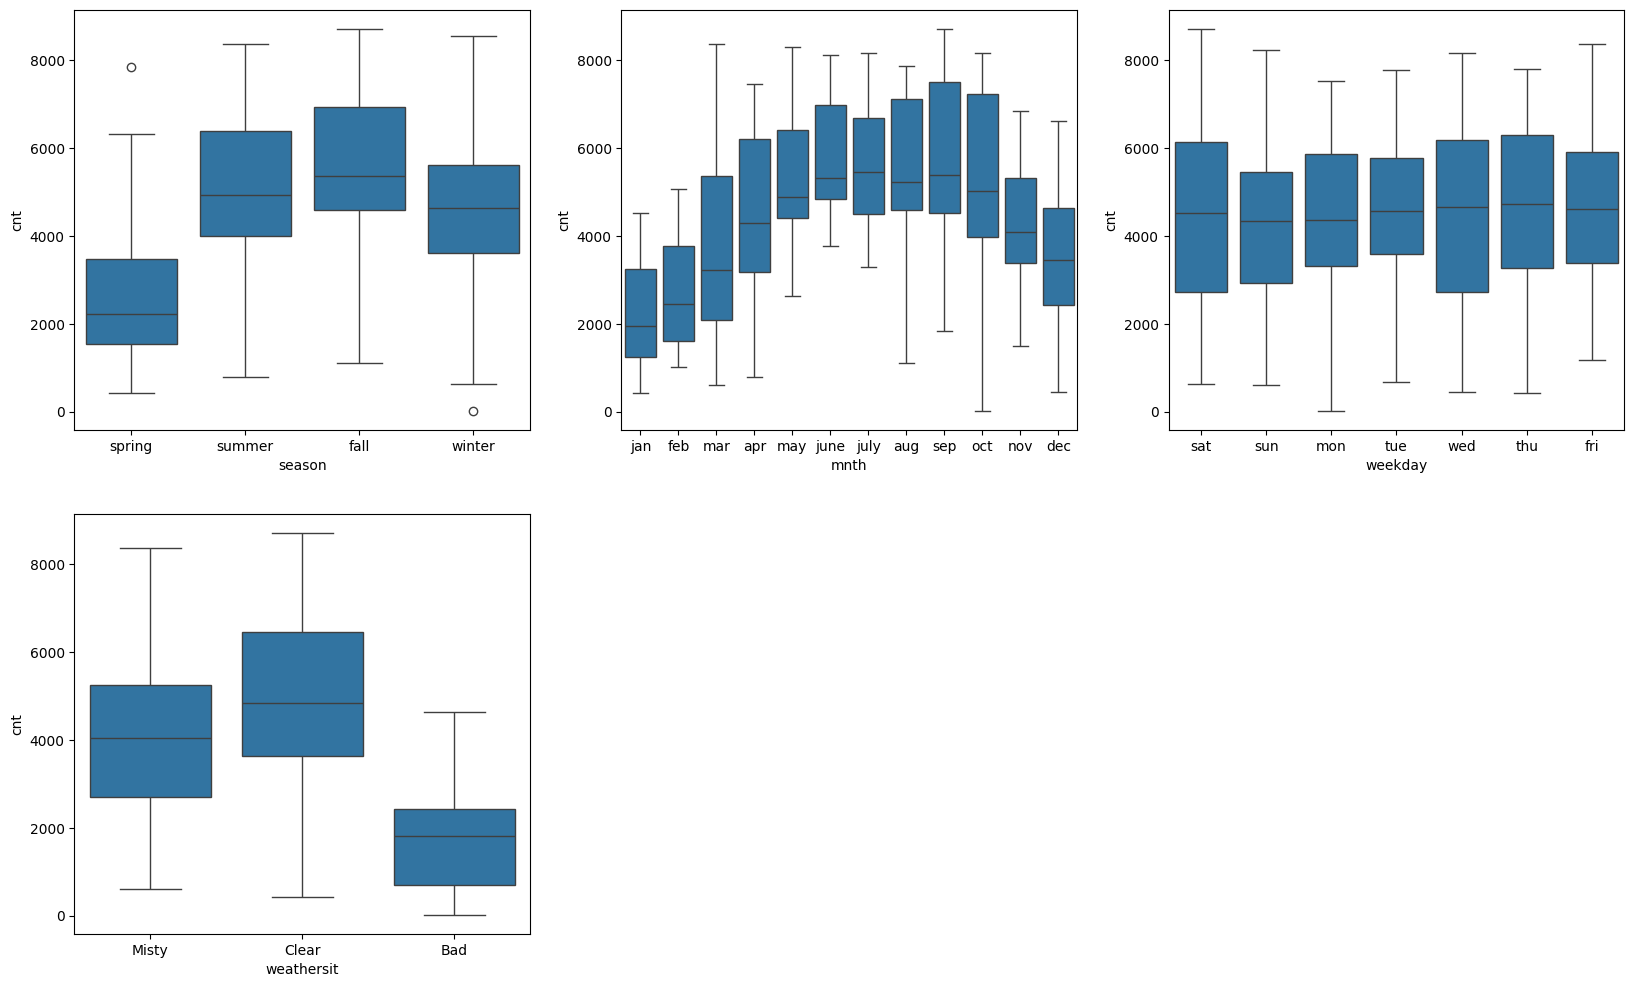

In [17]:
# visualising the categorical variables

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

- Here we can visualise that summer and fall season are highly correlated with cnt
- Months between April to Oct we can see increase in cnt
- Clear weather situation is also having most number of cnts

#### Effect on Target Variable from Categorical Variables

In [18]:
def get_categorical_plots(column):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.barplot(data=df, x=column, y='cnt')
    plt.subplot(1,2,2)
    sns.barplot(data=df, x=column, y='cnt', hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

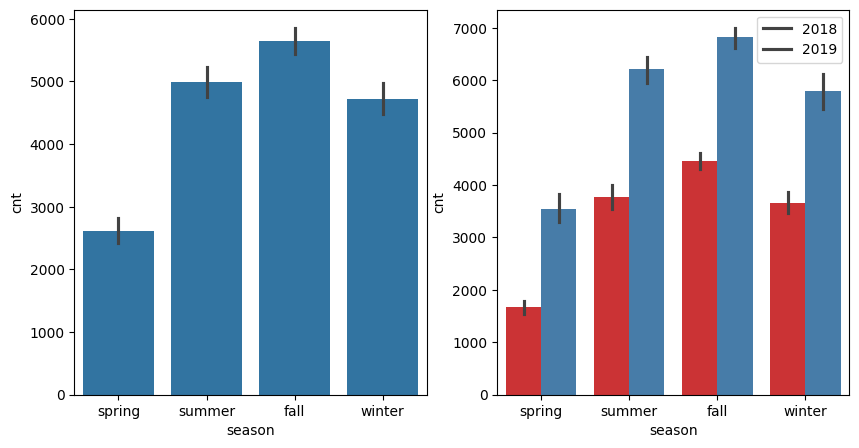

In [19]:
get_categorical_plots('season')

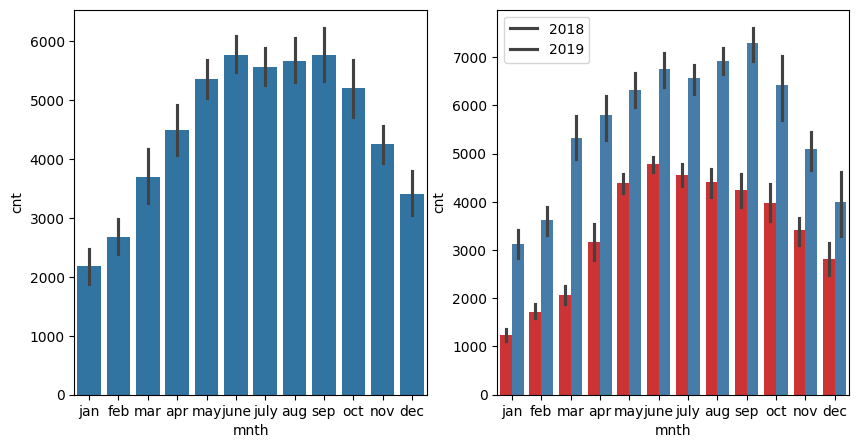

In [20]:
get_categorical_plots('mnth')

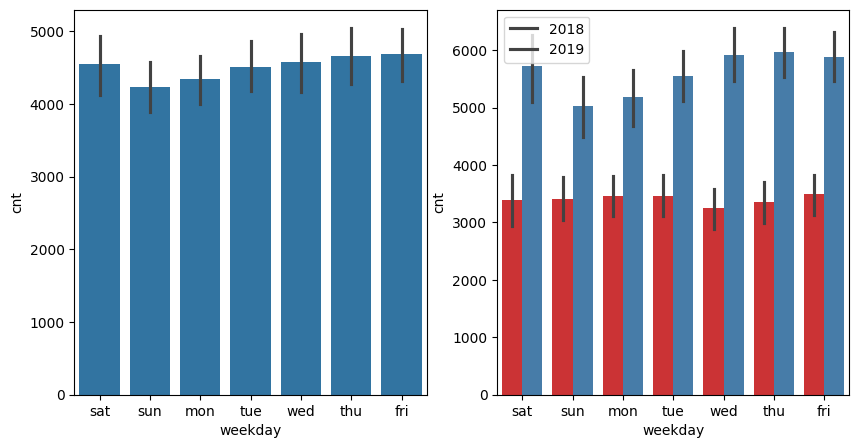

In [21]:
get_categorical_plots('weekday')

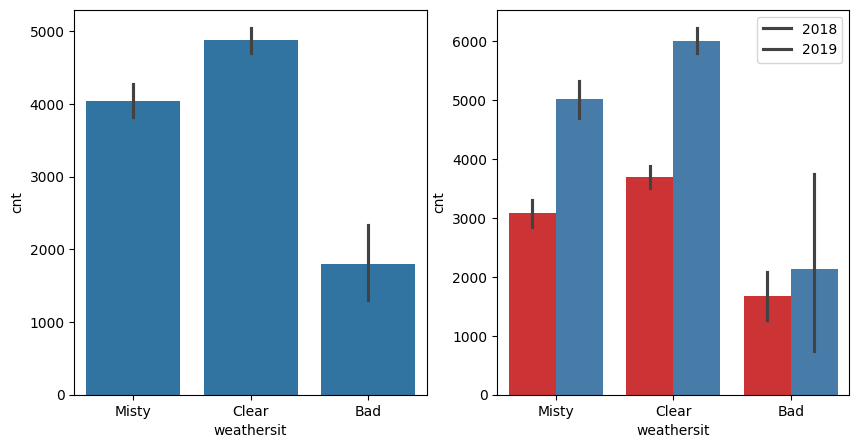

In [22]:
get_categorical_plots('weathersit')

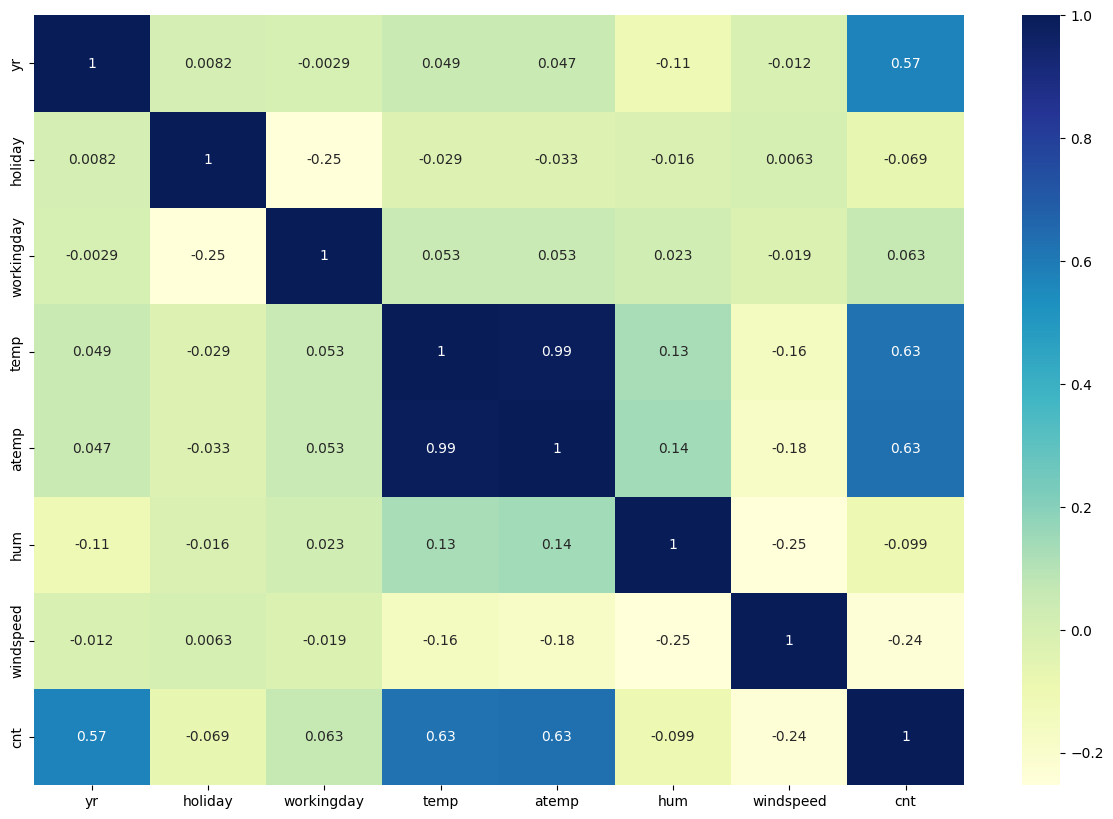

In [23]:
# Let's plot the heat map to see the correlation between numeric variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

- we can see a +ve correlation between cnt and year, cnt and temp, cnt and atemp
- temp and atemp are having very high correlation of +0.99
- cnt is having -ve correlation with holiday, humidity, windspeed

### Step 2: Preparing the Data for Modelling

Steps for data preparations
- Encoding:
  - other categorical vars to dummy vars
- Splitting into train and test
- Rescaling

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Dummy Variabels

In [25]:
# creating dummy variables for season
# dropping the redundant dummy vars
seasons = pd.get_dummies(df['season'], drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
# creating dummy variables for mnth
mnth = pd.get_dummies(df['mnth'], drop_first=True)
mnth.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [27]:
# creating dummy variables for weekday
weekday = pd.get_dummies(df['weekday'], drop_first=True)
weekday.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [28]:
# creating dummy variables for weathersit
weathersit = pd.get_dummies(df['weathersit'], drop_first=True)
weathersit.head()

,Clear,Misty
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [29]:
# concat the dummy datasets with original bike dataset
df = pd.concat([df,seasons, mnth, weekday, weathersit], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Clear,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  aug         730 non-null    uint8  
 16  dec         730 non-null    uint8  
 17  feb         730 non-null    uint8  
 18  jan         730 non-null    uint8  
 19  july        730 non-null    u

In [31]:
# create a new variable and drop the unecessary colums
bike_df = df.drop(['season','mnth','weekday','weathersit'], axis = 1)

In [32]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  july        730 non-null    uint8  
 16  june        730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

In [33]:
bike_df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Clear,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1


### Split dataset into train and test

In [34]:
# splitting into 70:30 ratio of train-test
df_train, df_test = train_test_split(bike_df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the Features 

Here we can see that except for `temp, atemp, hum, windspeed, cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 
We will use the Min-Max scaling (normalisation): Between 0 and 1

In [35]:
# Instantiate the object
scaler = MinMaxScaler()

# create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Clear,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### we can see now all the variables are now scaled between 0 and 1

### Step 3: Training the Model

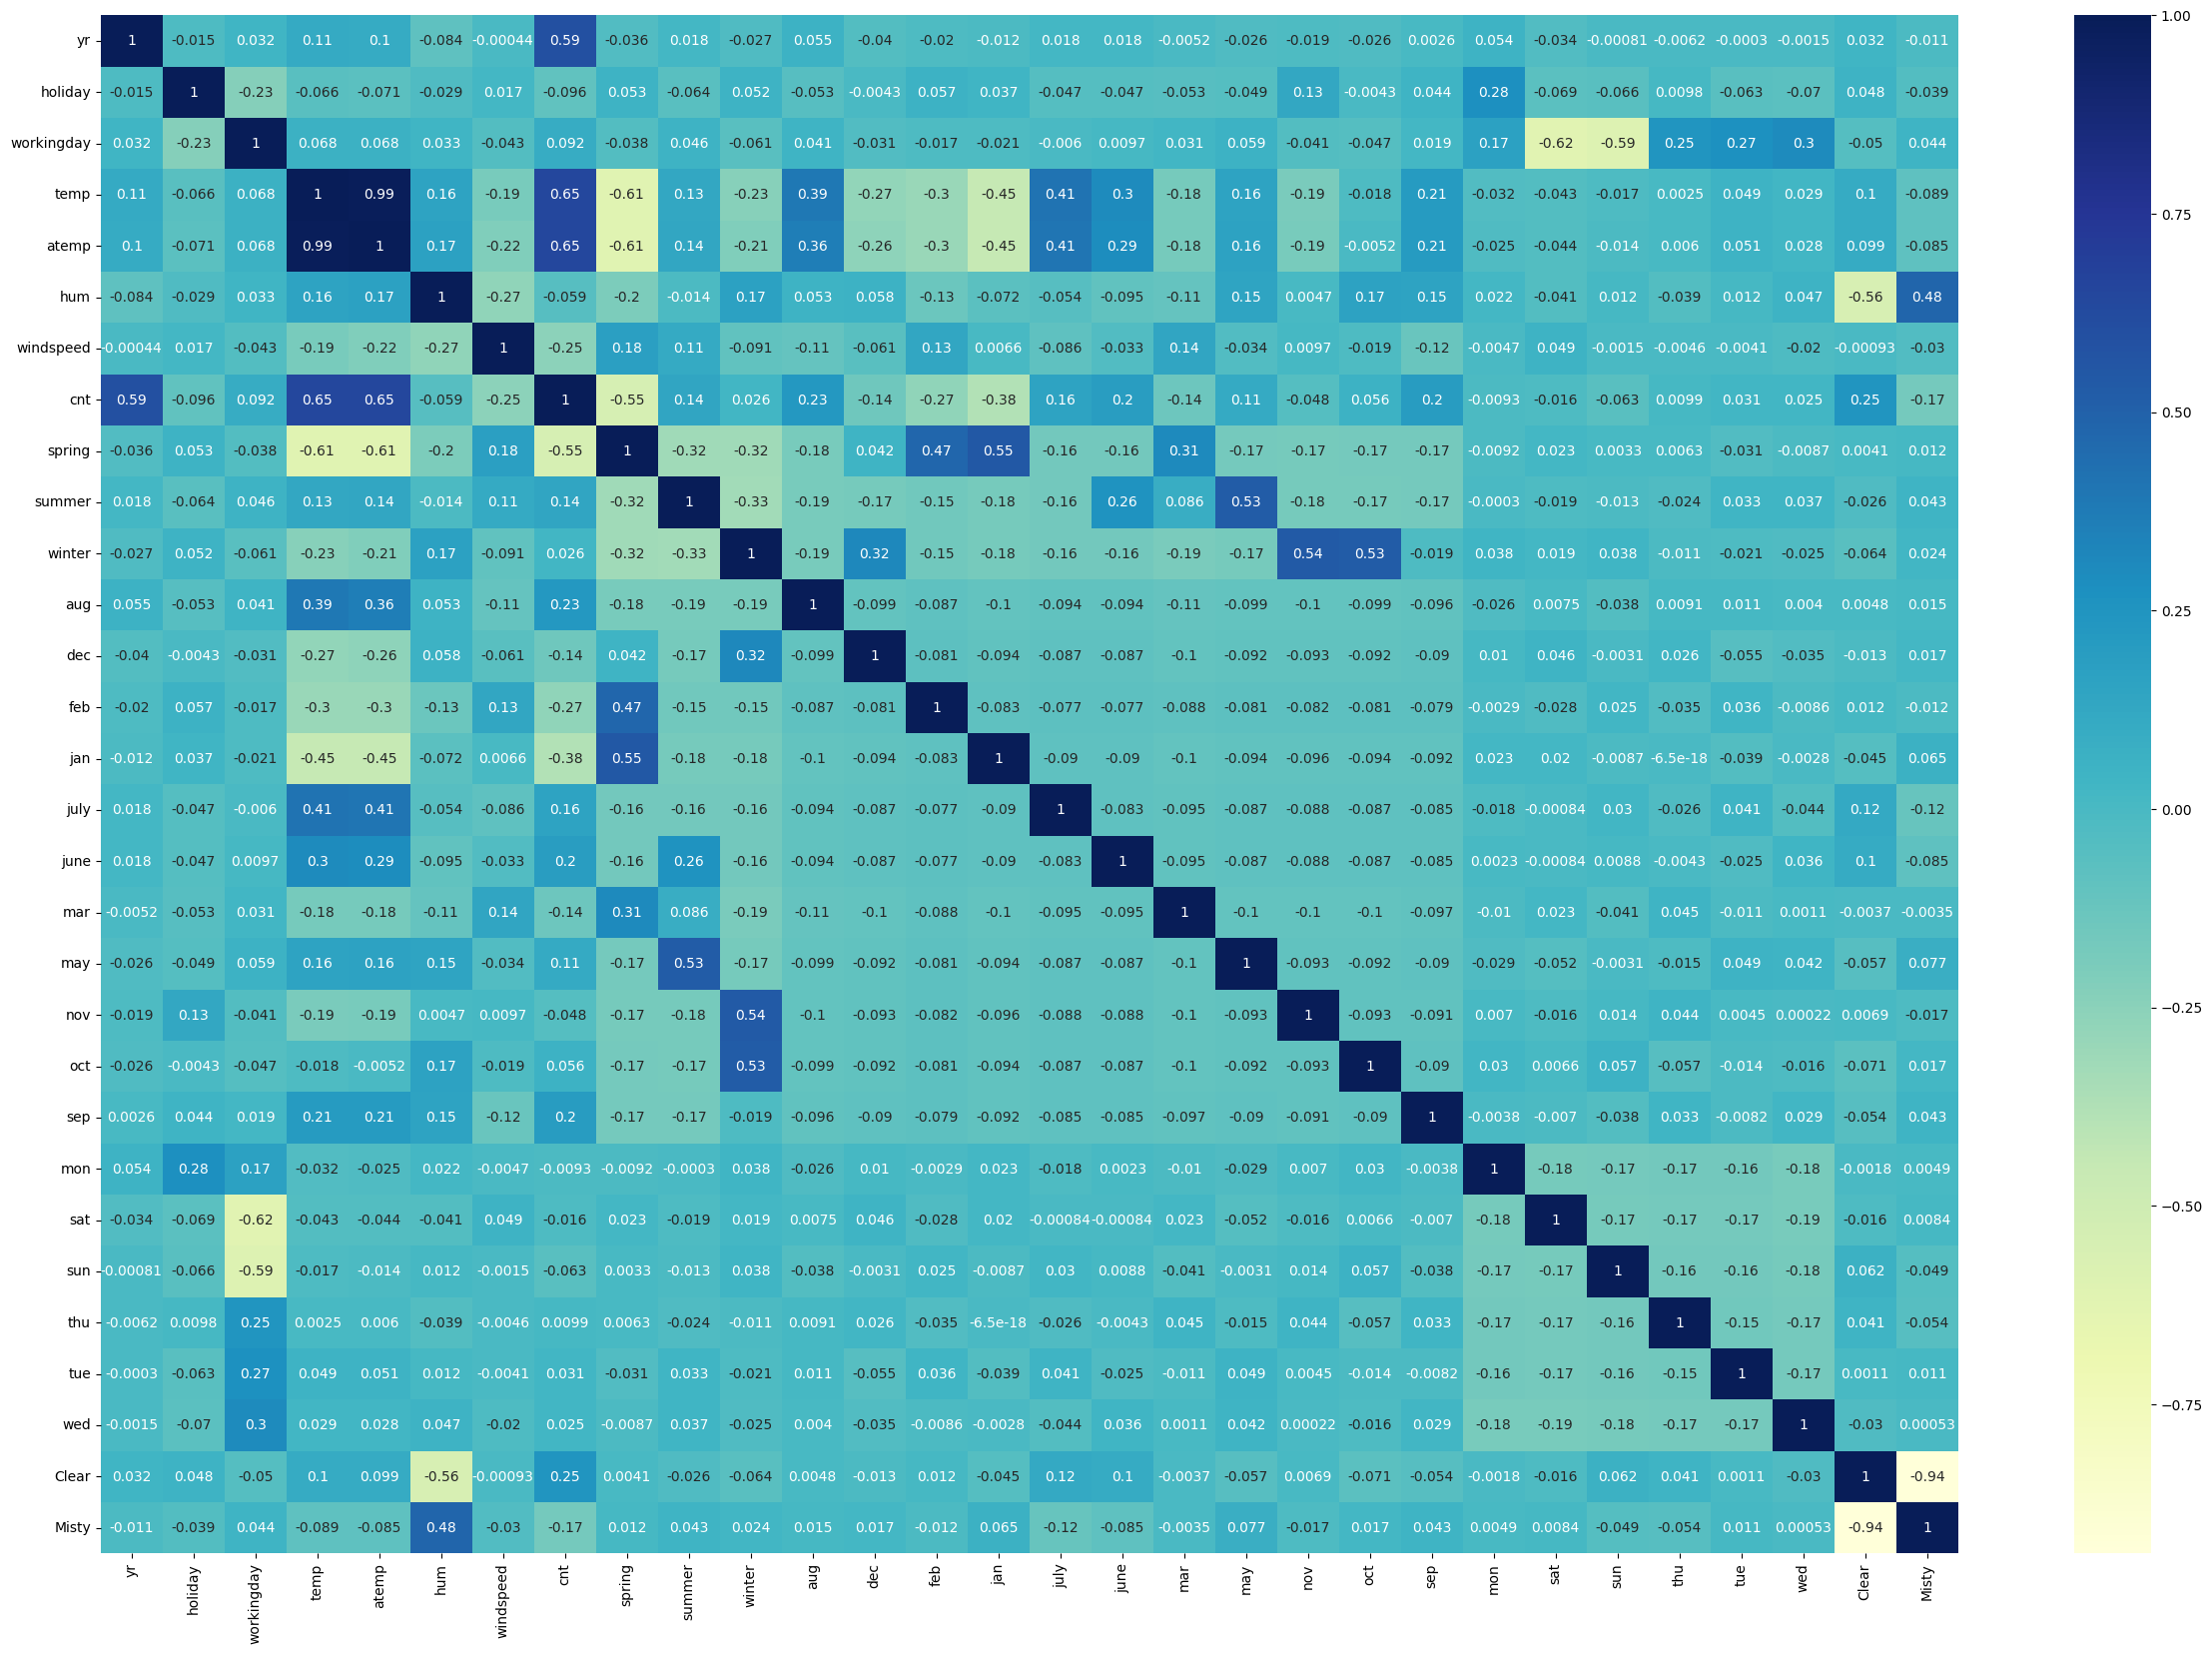

In [37]:
# heatmap to check which variable is most correlated with cnt
plt.figure(figsize = (30,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

- we can see +ve correlation between cnt and yr, cnt and temp, cnt and atemp
- we can see highly -ve correlation between cnt and spring, cnt and jan month 

### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

### Recursive feature elimination

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [40]:
# let's see what 15 features RFE selects and their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Clear', True, 1),
 ('Misty', True, 1)]

In [41]:
# variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Clear', 'Misty'],
      dtype='object')

In [42]:
# variables did not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        13:51:14   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.038      0.093      0.926      -0.071       0.078
yr             0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0674      0.022     -3.012      0.003      -0.111      -0.023
workingday     0.0347      0.011      3.044      0.002       0.012       0.057
temp           0.5277      0.033     15.884      0.000       0.462       0.593
hum           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
july          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep            0.0820      0.017      4.966      0.000       0.050       0.114
sat            0.0447      0.013      3.422      0.001       0.019       0.070
sun           -0.0084      0.014     -0.599      0.550      -0.036       0.019
Clear          0.2450      0.026      9.395      0.000       0.194       0.296
Misty          0.1887      0.025      7.641      0.000       0.140       0.237
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     8.69e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
# Here we can see sun has very high p-value, we should remove them
X_train_new = X_train_rfe.drop(["sun"], axis = 1)

In [48]:
# Rebuild the models without these variables
X_train_lm = sm.add_constant(X_train_new)

In [49]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.11e-191
Time:                        13:51:16   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.048     -0.100      0.9

### Checking VIF

In [51]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'july', 'sep', 'sat', 'Clear', 'Misty'],
      dtype='object')

In [52]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [53]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.02
3,temp,21.44
12,Clear,14.44
13,Misty,8.92
6,spring,5.53
2,workingday,5.41
5,windspeed,4.66
8,winter,4.03
7,summer,3.19
0,yr,2.09


### Remove high VIF variables and create new model

In [54]:
# variable hum is having very high VIF, it can be the case of multicollinearity, so removing it would be good choice
X_train_new = X_train_new.drop(['hum'], axis=1)

In [55]:
X_train_lm = sm.add_constant(X_train_new)

In [56]:
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.28e-188
Time:                        13:51:19   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1320      0.039     -3.393      0.001      -0.208      -0.056
yr             0.2337      0.008     28.828      0.000       0.218       0.250
holiday       -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday     0.0461      0.012      3.931      0.000       0.023       0.069
temp           0.4915      0.033     15.027      0.000       0.427       0.556
windspeed     -0.1491      0.025     -6.024      0.000      -0.198      -0.100
spring        -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer         0.0477      0.015      3.180      0.002       0.018       0.077
winter         0.0846      0.017      4.971      0.000       0.051       0.118
july          -0.0496      0.018     -2.702      0.007      -0.086      -0.014
sep            0.0759      0.017      4.537      0.000       0.043       0.109
sat            0.0579      0.015      3.924      0.000       0.029       0.087
Clear          0.2895      0.024     11.880      0.000       0.242       0.337
Misty          0.2074      0.025      8.383      0.000       0.159       0.256
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'july', 'sep', 'sat', 'Clear', 'Misty'],
      dtype='object')

In [58]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Clear,14.42
3,temp,13.42
12,Misty,8.21
2,workingday,5.33
4,windspeed,4.63
5,spring,4.16
6,summer,2.78
7,winter,2.73
0,yr,2.07
10,sat,1.99


In [59]:
# let's remove clear and rebuild the model
X_train_new = X_train_new.drop(['Clear'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     161.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          6.82e-163
Time:                        13:51:20   Log-Likelihood:                 444.35
No. Observations:                 510   AIC:                            -862.7
Df Residuals:                     497   BIC:                            -807.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1512      0.035      4.345      0.000       0.083       0.220
yr             0.2393      0.009     26.106      0.000       0.221       0.257
holiday       -0.0490      0.031     -1.578      0.115      -0.110       0.012
workingday     0.0390      0.013      2.942      0.003       0.013       0.065
temp           0.5040      0.037     13.615      0.000       0.431       0.577
windspeed     -0.1788      0.028     -6.413      0.000      -0.234      -0.124
spring        -0.0584      0.024     -2.480      0.013      -0.105      -0.012
summer         0.0505      0.017      2.976      0.003       0.017       0.084
winter         0.0740      0.019      3.849      0.000       0.036       0.112
july          -0.0527      0.021     -2.532      0.012      -0.094      -0.012
sep            0.0664      0.019      3.508      0.000       0.029       0.104
sat            0.0507      0.017      3.037      0.003       0.018       0.083
Misty         -0.0683      0.010     -7.054      0.000      -0.087      -0.049
==============================================================================
Omnibus:                      143.125   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.088
Skew:                          -1.247   Prob(JB):                    3.50e-115
Kurtosis:                       7.311   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Dropping holiday as it is now having high p-value
X_train_new = X_train_new.drop(['holiday'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.73e-163
Time:                        13:51:21   Log-Likelihood:                 443.08
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     498   BIC:                            -811.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1440      0.035      4.169      0.000       0.076       0.212
yr             0.2394      0.009     26.082      0.000       0.221       0.257
workingday     0.0463      0.012      3.720      0.000       0.022       0.071
temp           0.5043      0.037     13.604      0.000       0.431       0.577
windspeed     -0.1794      0.028     -6.427      0.000      -0.234      -0.125
spring        -0.0593      0.024     -2.512      0.012      -0.106      -0.013
summer         0.0508      0.017      2.990      0.003       0.017       0.084
winter         0.0734      0.019      3.811      0.000       0.036       0.111
july          -0.0518      0.021     -2.486      0.013      -0.093      -0.011
sep            0.0648      0.019      3.422      0.001       0.028       0.102
sat            0.0581      0.016      3.619      0.000       0.027       0.090
Misty         -0.0680      0.010     -7.006      0.000      -0.087      -0.049
==============================================================================
Omnibus:                      143.633   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.708
Skew:                          -1.253   Prob(JB):                    4.24e-115
Kurtosis:                       7.302   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.72
1,workingday,4.63
3,windspeed,4.59
4,spring,2.38
5,summer,2.32
0,yr,2.06
6,winter,1.90
9,sat,1.82
7,july,1.58
10,Misty,1.54


In [62]:
# Dropping july as it is now having -ve coefficient and also p-value is more then 0.00
X_train_new = X_train_new.drop(['july'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.59e-163
Time:                        13:51:23   Log-Likelihood:                 439.93
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     499   BIC:                            -811.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1348      0.035      3.903      0.000       0.067       0.203
yr             0.2399      0.009     26.015      0.000       0.222       0.258
workingday     0.0473      0.013      3.780      0.000       0.023       0.072
temp           0.4911      0.037     13.317      0.000       0.419       0.564
windspeed     -0.1796      0.028     -6.400      0.000      -0.235      -0.124
spring        -0.0475      0.023     -2.044      0.041      -0.093      -0.002
summer         0.0663      0.016      4.173      0.000       0.035       0.098
winter         0.0861      0.019      4.615      0.000       0.049       0.123
sep            0.0789      0.018      4.344      0.000       0.043       0.115
sat            0.0584      0.016      3.620      0.000       0.027       0.090
Misty         -0.0666      0.010     -6.838      0.000      -0.086      -0.047
==============================================================================
Omnibus:                      143.291   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.846
Skew:                          -1.263   Prob(JB):                    8.70e-111
Kurtosis:                       7.179   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.47
1,workingday,4.63
3,windspeed,4.58
4,spring,2.29
0,yr,2.06
5,summer,2.00
8,sat,1.82
6,winter,1.74
9,Misty,1.54
7,sep,1.22


In [64]:
# let's remove spring as it is having -ve coefficient and high p-value
X_train_new = X_train_new.drop(['spring'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.38e-163
Time:                        13:51:24   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0786      0.021      3.751      0.000       0.037       0.120
yr             0.2388      0.009     25.858      0.000       0.221       0.257
workingday     0.0479      0.013      3.818      0.000       0.023       0.073
temp           0.5514      0.022     24.814      0.000       0.508       0.595
windspeed     -0.1838      0.028     -6.550      0.000      -0.239      -0.129
summer         0.0886      0.012      7.646      0.000       0.066       0.111
winter         0.1161      0.012     10.019      0.000       0.093       0.139
sep            0.0876      0.018      4.948      0.000       0.053       0.122
sat            0.0591      0.016      3.655      0.000       0.027       0.091
Misty         -0.0663      0.010     -6.794      0.000      -0.086      -0.047
==============================================================================
Omnibus:                      136.515   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.216
Skew:                          -1.225   Prob(JB):                     6.35e-99
Kurtosis:                       6.909   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.40
0,yr,2.01
7,sat,1.68
4,summer,1.57
8,Misty,1.50
5,winter,1.38
6,sep,1.20


#### Here we can observe that our R^2 is pretty good which is 0.791 and all the p-values are as well 0.00 as well as VIF as less then 5 for all the variables. We can consider this model

### Residual Analysis of the Train Data

In [66]:
y_train_cnt = lm.predict(X_train_lm)

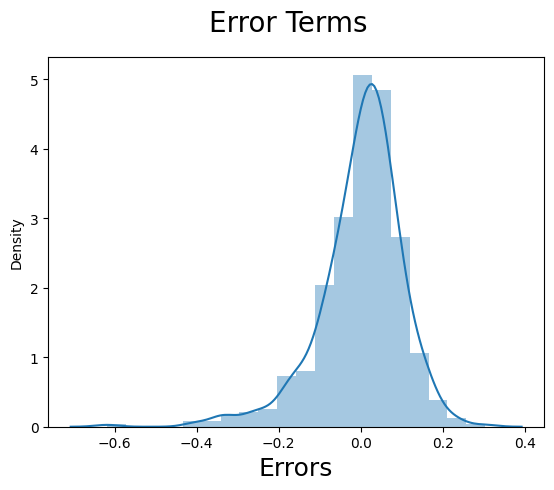

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

#### We can see that the error terms are also normally distributed

### Linearity Check

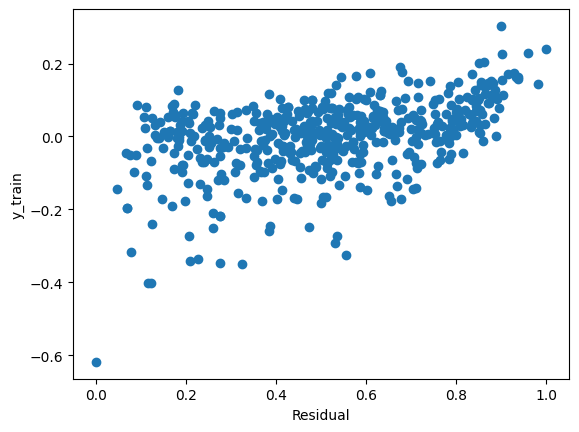

In [68]:
#scatter plot for the check
residual = (y_train - y_train_cnt)
plt.scatter(y_train, residual)
plt.ylabel('y_train')
plt.xlabel('Residual')
plt.show()

### Making Predictions Using our Model

In [69]:
# Applying the scaling on the test set
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [70]:
y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [72]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [73]:
# calculate the r2 score for test data
r2 = r2_score(y_test, y_pred)
round(r2,3)

0.769

Training R2 = 0.791: This means that our model explains 79.1% of the variance in the training data, which is a good result.

Test R2 = 0.769: This is also a strong result, suggesting that our model explains 76.9% of the variance in the test data.


Key Interpretations:

1. Good Model Fit: Both scores are high, showing that our model fits the data well and captures most of the variance.


2. Low Overfitting: Since the R2 values are quite similar for both training and test datasets, our model isn't overfitting to the training data, which is a positive sign.

#### Model Evaluation

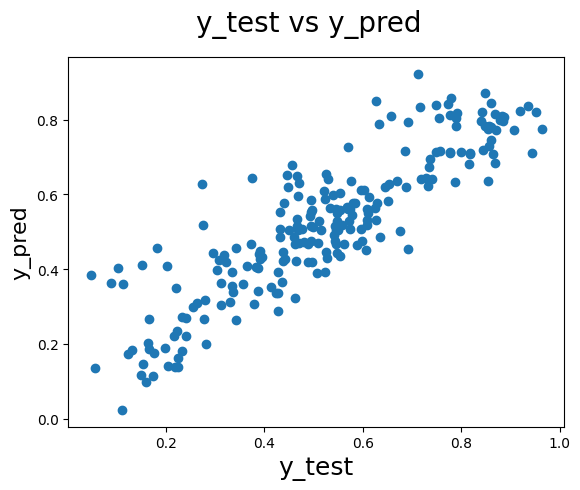

In [74]:
#plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test',fontsize =18)
plt.ylabel('y_pred',fontsize = 16)
plt.show()

We can see that the equation of our best fitted line is:

$ cnt = 0.2388  \times  yr + 0.0479  \times  workingday + 0.5514 \times temp - 0.1838 \times windspeed + 0.0886 \times summer + 0.1161 \times winter + 0.0876 \times sep + 0.0591 \times sat - 0.0663 \times Misty $

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features
2. Build a non-linear model